# Asymptotic estimates

### Auxilliary functions

In [2]:
from scipy.optimize import fsolve
from math import log, log2
import matplotlib.pyplot as plt

def plot(L,label_list):
    """
    function to plot list of lists of the form L=[L1,L2,...] with Li=[[x1,y1],[x2,y2],...]
    """
    c=0
    for Li in L:
        x,y=zip(*Li)
        plt.scatter(x,y, label=label_list[c],s=1)
        c+=1
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
def Hqi(v,q):
    """
    inverse of q-ary entropy function
    """
    if v==1:
        return 1-1/q
    return fsolve(lambda x:v -(x[0]*log(q-1,q)-x[0]*log(x[0],q)-(1-x[0])*log(1-x[0],q)),0.0000001)[0]

def H(q,x):
    """
    q-ary entropy function
    """
    if x<=0 or x>=1:
        return 0
    return x * log(q-1,q) - x * log(x,q) - (1-x) * log(1-x,q)

def binomH(n,k):
    """
    asymptotic approximation of binomial coefficients (Eq. (1))
    """
    return n*H(2,k/n)


### Complexity of different approaches

In [3]:
from scipy.optimize import fsolve,minimize_scalar

def constraint_opt(w,q,k):
    """
    optimal w satisfies constraint_opt(w,q,k)=0 (balances factors 2*Nw and ISD)
    """
    return binomH(1,w)*3/2+log2(q-1)*5*w/2+binomH(1-k,w)-log2(q)*(1-k)*5/2

def compl_new(q,R):
    """
    Asymptotic complexity of Algorithm 4
    """
    w= max(Hqi(1-R,q),fsolve(lambda x:constraint_opt(x[0],q,R),0.0000001)[0])
    Nw = binomH(1,w)+log2(q-1)*w-log2(q)*(1-R)
    ISD = binomH(1,w)-binomH(1-R,w)-Nw/2
    return max(ISD,2*Nw)

def lowerbound(q,R):
    """
    Lowerbound for codeword finding based algorithms
    """
    def compl_lower_bound(w):
        Nw = binomH(1,w)+log2(q-1)*w-log2(q)*(1-R)
        if Nw<0:
            return 10000
        return max(binomH(1,w)-binomH(1-R,w)-Nw,0)+Nw/2
    return minimize_scalar(compl_lower_bound, bounds=(0, 1-R), method='bounded').fun

def lowerbound_2(q,R):
    """
    Semi-Lowerbound assuming Compatible-Pairs runs in time linear in V,W
    """
    def compl_lower_bound(w):
        Nw = binomH(1,w)+log2(q-1)*w-log2(q)*(1-R)
        return max(binomH(1,w)-binomH(1-R,w)-Nw/2,Nw)
    return minimize_scalar(compl_lower_bound, bounds=(0, 1-R), method='bounded').fun

def cf_mitm(q,R):
    """
    Complexity of CF-MITM
    """
    return H(2,R)/2

def leon(q,R):
    """
    Complexity of Leon's algorithm
    """
    w = Hqi(1-R,q)
    return binomH(1,w)-binomH(1-R,w)

### Fixed Rate

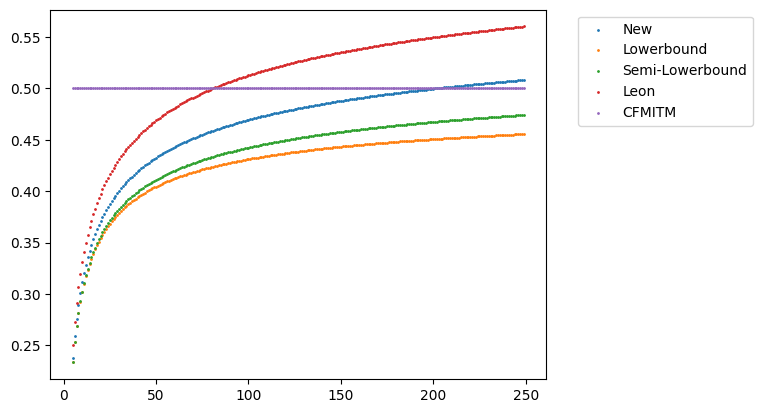

In [4]:
R=1/2

Lleo=[]
Lnew=[]
Lcf=[]
Llow1=[]
Llow0=[]
for q in range(5,250):
    Lleo.append([q,leon(q,R)])
    Lnew.append([q,compl_new(q,R)])
    Lcf.append([q,cf_mitm(q,R)])
    Llow1.append([q,lowerbound(q,R)])
    Llow0.append([q,lowerbound_2(q,R)])
plot([Lnew,Llow1,Llow0,Lleo,Lcf],["New","Lowerbound", "Semi-Lowerbound","Leon","CFMITM"])

### Fixed q

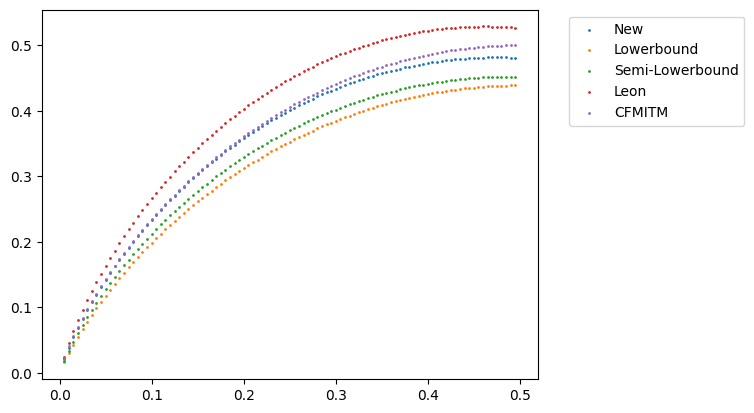

In [5]:
Lleo=[]
Lnew=[]
Lcf=[]
Llow1=[]
Llow0=[]
q=127
for i in range(1,100):
    R=i/200
    Lleo.append([R,leon(q,R)])
    Lnew.append([R,compl_new(q,R)])
    Lcf.append([R,cf_mitm(q,R)])
    Llow1.append([R,lowerbound(q,R)])
    Llow0.append([R,lowerbound_2(q,R)])
plot([Lnew,Llow1,Llow0,Lleo,Lcf],["New","Lowerbound", "Semi-Lowerbound","Leon","CFMITM"])
    
